### 1. Датасет

https://www.kaggle.com/datasets/sivadithiyan/edm-music-genres

В этом датасете собрано 16 различных музыкальных стилей

- Ambient 🌌
- Big Room House 🏠
- Drum and Bass 🥁
- Dubstep 🎵
- Future Garage/Wave Trap 🌊
- Hardcore 🔊
- Hardstyle 💥
- House 🏡
- Lo-fi 🎶
- Moombahton/Reggaeton 🎵🌴
- Phonk 🔥
- Psytrance 🌀
- Synthwave 🎹
- Techno 🎛️
- Trance 🚀
- Trap ⛓️


Для каждого показателя хранится среднее значение и стандартное отклонение


### 2. EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# устанавливаем точность чисел с плавающей точкой
%precision % .4f

import warnings

warnings.filterwarnings('ignore')  # отключаем предупреждения

In [2]:
df = pd.read_csv('../../data/edm_music/train_data_final.csv')
# df2 = pd.read_csv('../../data/edm_music/test_data_final.csv')
df.head()

,rmse_mean,rmse_std,spectral_centroid_mean,spectral_centroid_std,spectral_bandwidth_mean,spectral_bandwidth_std,rolloff_mean,rolloff_std,zero_crossing_rate_mean,zero_crossing_rate_std,...,tonnetz4_std,tonnetz5_mean,tonnetz5_std,tonnetz6_mean,tonnetz6_std,chroma_cqt_mean,chroma_cqt_std,spectral_contrast_mean,spectral_contrast_std,label
0,0.235332,0.026495,1051.946600,100.585427,1370.959281,83.231605,1983.042368,171.870662,0.051014,0.009117,...,0.063497,0.011261,0.022174,-0.003420,0.020674,0.363720,0.272265,22.644232,11.780977,ambient
1,0.228770,0.033676,1070.286437,80.816581,1369.265205,80.522645,1983.290828,119.464846,0.052434,0.009300,...,0.099821,0.014858,0.031751,-0.044123,0.025047,0.373004,0.272607,23.334553,11.330307,ambient
2,0.226299,0.023821,1360.202520,60.369947,1698.988729,42.774033,2531.642127,132.529514,0.068791,0.009082,...,0.050842,0.031071,0.027402,0.002164,0.018851,0.636473,0.181836,19.827988,12.566806,ambient
3,0.086559,0.085427,1510.821407,453.989878,1993.545837,373.650514,2914.933143,1245.966854,0.055337,0.018990,...,0.272185,-0.021059,0.068133,0.041426,0.097910,0.408626,0.268816,20.136745,10.750138,ambient
4,0.082979,0.074022,1215.704928,431.555006,1712.301348,388.379755,2095.429124,1074.247611,0.043280,0.013200,...,0.125701,-0.095658,0.092349,-0.116562,0.025237,0.294634,0.296929,22.229635,10.648263,ambient


In [3]:
df.isnull().sum()

rmse_mean                  0
rmse_std                   0
spectral_centroid_mean     0
spectral_centroid_std      0
spectral_bandwidth_mean    0
                          ..
chroma_cqt_mean            0
chroma_cqt_std             0
spectral_contrast_mean     0
spectral_contrast_std      0
label                      0
Length: 131, dtype: int64

Пропущенных значений нет

In [4]:
df["label"].unique()

array(['ambient', 'big_room_house', 'dnb', 'dubstep',
       'future_garage_wave_trap', 'hardcore', 'hardstyle', 'house',
       'lofi', 'moombahton_reggaeton', 'phonk', 'psytrance', 'synthwave',
       'techno', 'trance', 'trap'], dtype=object)

Этот датасет описывает 16 музыкальных поджанров EDM.

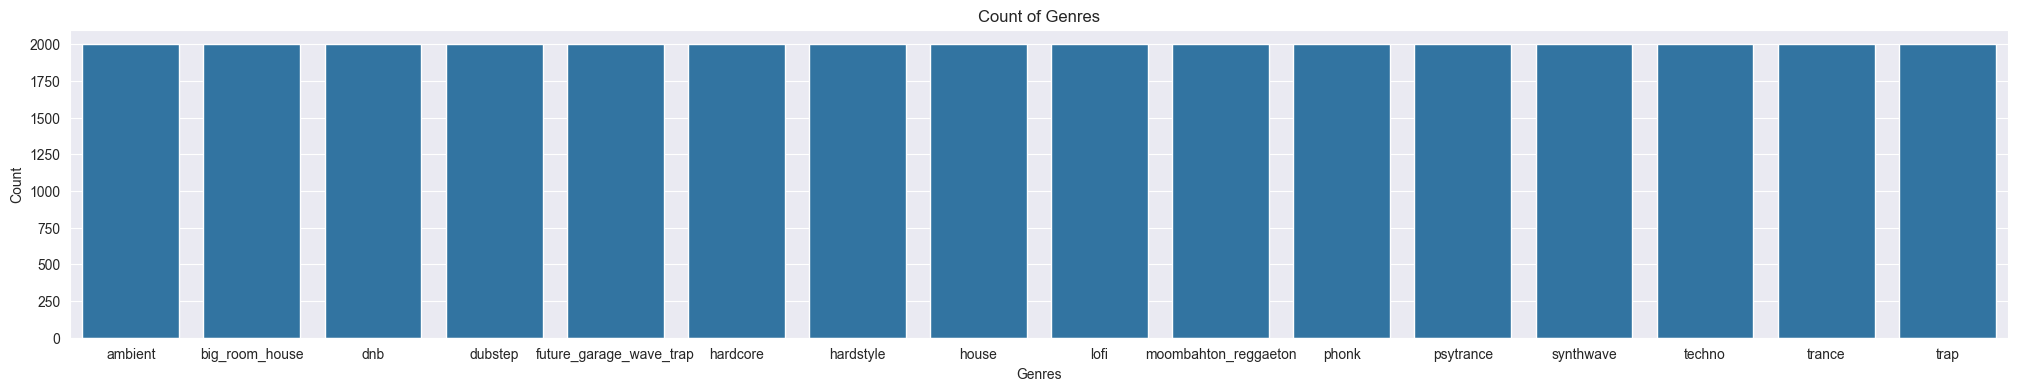

In [5]:
plt.figure(figsize=(25, 4))
sns.countplot(x='label', data=df)
plt.title('Count of Genres')
plt.xlabel('Genres')
plt.ylabel('Count')

plt.show()

Количество строк с данными одинаково для каждого музыкального жанра


Метрики, собранные в датасете не ясны для интерпретации, так как представляют собй скорее математическое описание отрезков музыки. Их нельзя также ясно интерпретировать, как например темп, или частоту.

В датасете собрано достаточно много различных жанров(16). Для учебной задачи это несколько избыточно. Посмотрим насколько удачно они разделяются на кластеры и удалим некоторые схожие жанры.

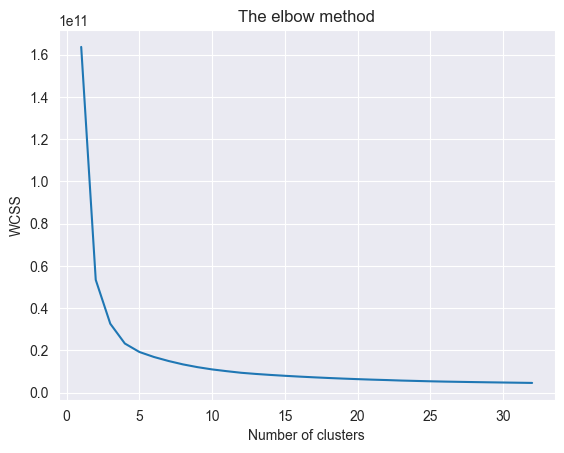

In [6]:
from sklearn.cluster import KMeans, AffinityPropagation, SpectralClustering
y = df['label']
X = df.drop(columns=['label'])
wcss = []

for i in range(1, 33):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 33), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

По методу локтя видно, что оптимальное количество кластеров меньше 16(около 7)
Также попробуем вычислить оптимальное количество кластеров с помощью метрики силуэт.

In [7]:
from sklearn.metrics import silhouette_score

for n_clusters in range(2 ,20):
    
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

For n_clusters = 2 The average silhouette_score is : 0.6039288906781554
For n_clusters = 3 The average silhouette_score is : 0.4568338443493846
For n_clusters = 4 The average silhouette_score is : 0.4160949584108865
For n_clusters = 5 The average silhouette_score is : 0.3607953435149416
For n_clusters = 6 The average silhouette_score is : 0.3258769428403572
For n_clusters = 7 The average silhouette_score is : 0.32539207658782815
For n_clusters = 8 The average silhouette_score is : 0.3130653436801824
For n_clusters = 9 The average silhouette_score is : 0.3142887286466983
For n_clusters = 10 The average silhouette_score is : 0.31285021362948284
For n_clusters = 11 The average silhouette_score is : 0.30992238218707846
For n_clusters = 12 The average silhouette_score is : 0.30313346416977827
For n_clusters = 13 The average silhouette_score is : 0.29957565301958655
For n_clusters = 14 The average silhouette_score is : 0.2934494785723076
For n_clusters = 15 The average silhouette_score is : 

Даже с помощью метрики силуэта не удалось определить подходящее количество кластеров для изначальных данных. 

In [8]:
from sklearn.metrics import accuracy_score
from scipy.stats import mode

unique = {key : i for i, key in enumerate(y.unique())}
y_nums = [unique[genre] for genre in y]

kmeans = KMeans(n_clusters=16 ,random_state=0)
clusters = kmeans.fit_predict(X)

labels = np.zeros_like(clusters)
for i in range(16):
    mask = (clusters == i)
    labels[mask] = mode(np.array(y_nums)[mask])[0]

accuracy_score(y_nums, labels)

 0.2712

Если обучим на этом датасете модель "как есть", то получим низкую точность(так как данные по разным жанрам могут перемешиваться)

In [9]:
y.unique()

array(['ambient', 'big_room_house', 'dnb', 'dubstep',
       'future_garage_wave_trap', 'hardcore', 'hardstyle', 'house',
       'lofi', 'moombahton_reggaeton', 'phonk', 'psytrance', 'synthwave',
       'techno', 'trance', 'trap'], dtype=object)

Попробуем провести преобразование tsne, чтобы визуально оценить кластеры.


In [10]:
%%time

from sklearn.manifold import TSNE

tsne = TSNE(random_state=42)
X_tsne = tsne.fit_transform(X)

CPU times: total: 2min 35s
Wall time: 1min 22s


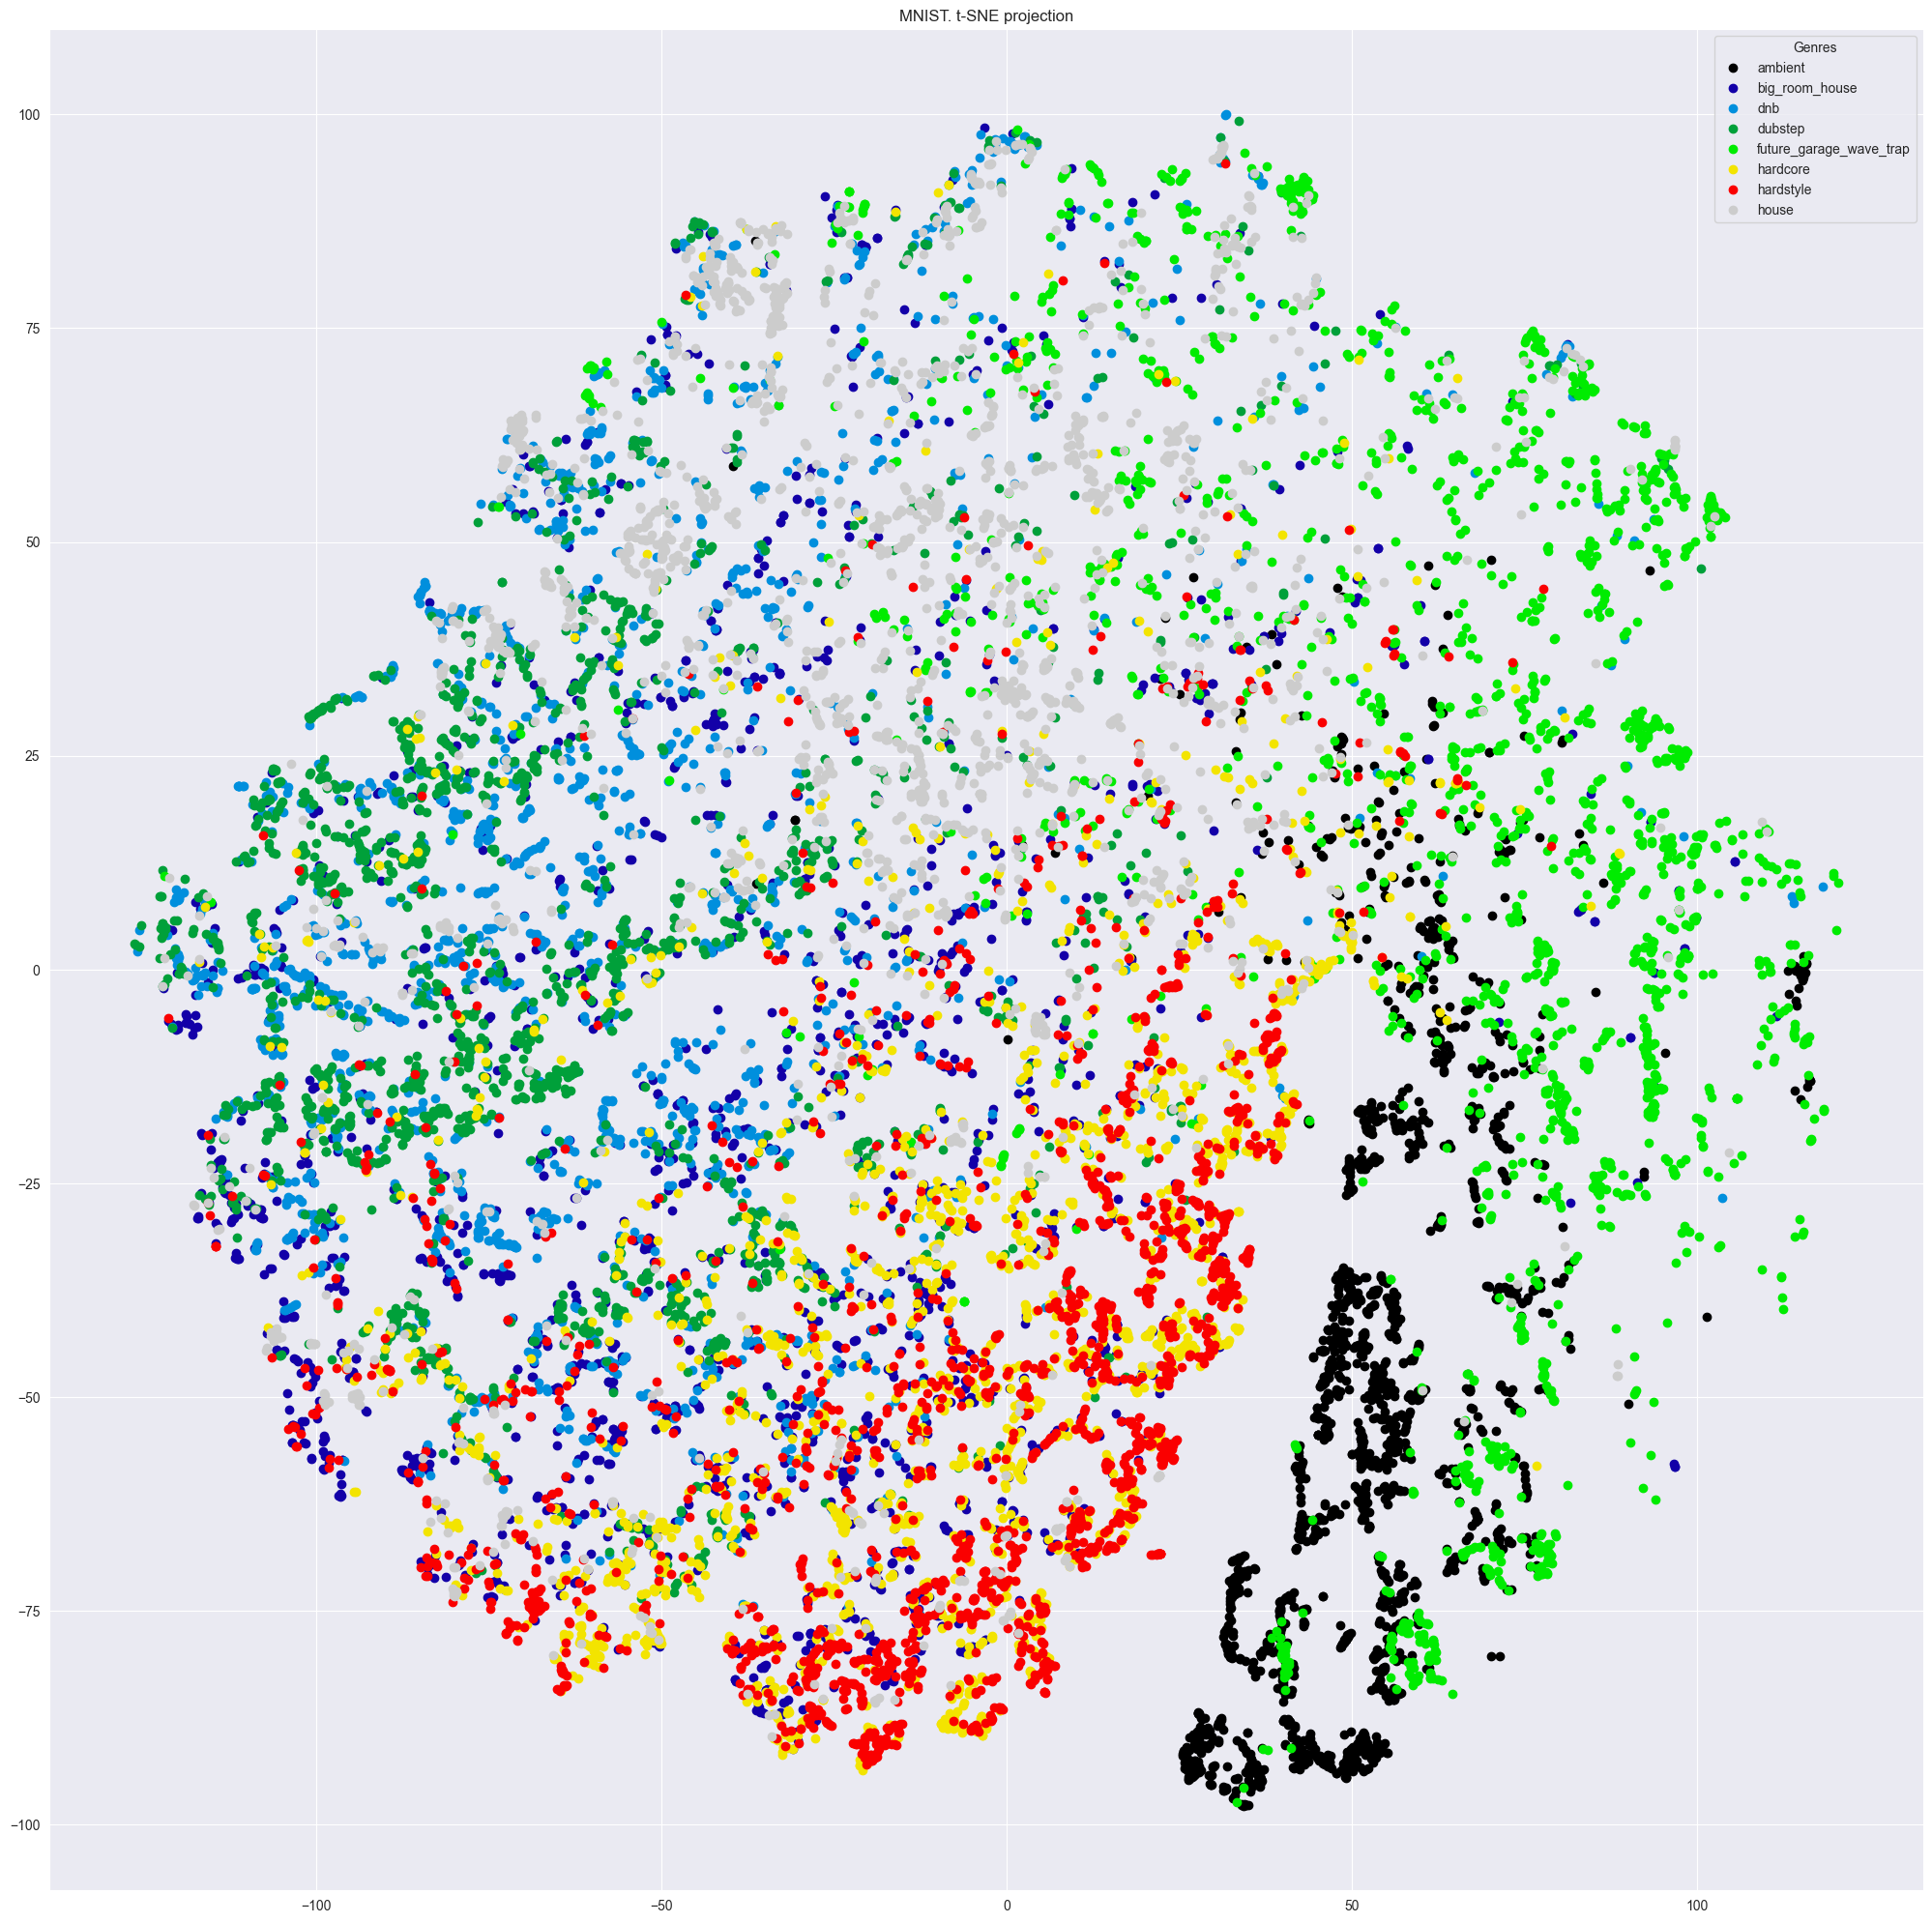

In [11]:

plt.figure(figsize=(25, 25))
cmap = plt.cm.get_cmap("nipy_spectral", 8)
for i, genre in enumerate(y.unique()[:8]):
    plt.plot(X_tsne[y == genre, 0], X_tsne[y == genre, 1], marker='o', 
              linestyle='', color=cmap(i/cmap.N), label=genre)
plt.legend(title='Genres')
plt.title("MNIST. t-SNE projection")
plt.show()

На этом графике видно, что hardcore и hardstyle (красный и желтый) похожи между собой, поэтому удалим один из них. Также удалим big room house(фиолетовый), так как он тоже достаточно похож на предыдущие, но значительно разбросан по плоскости. Зеленый, так как он "размазан" по плоскости. Удалим синий, так как он совпадает с бирюзовым

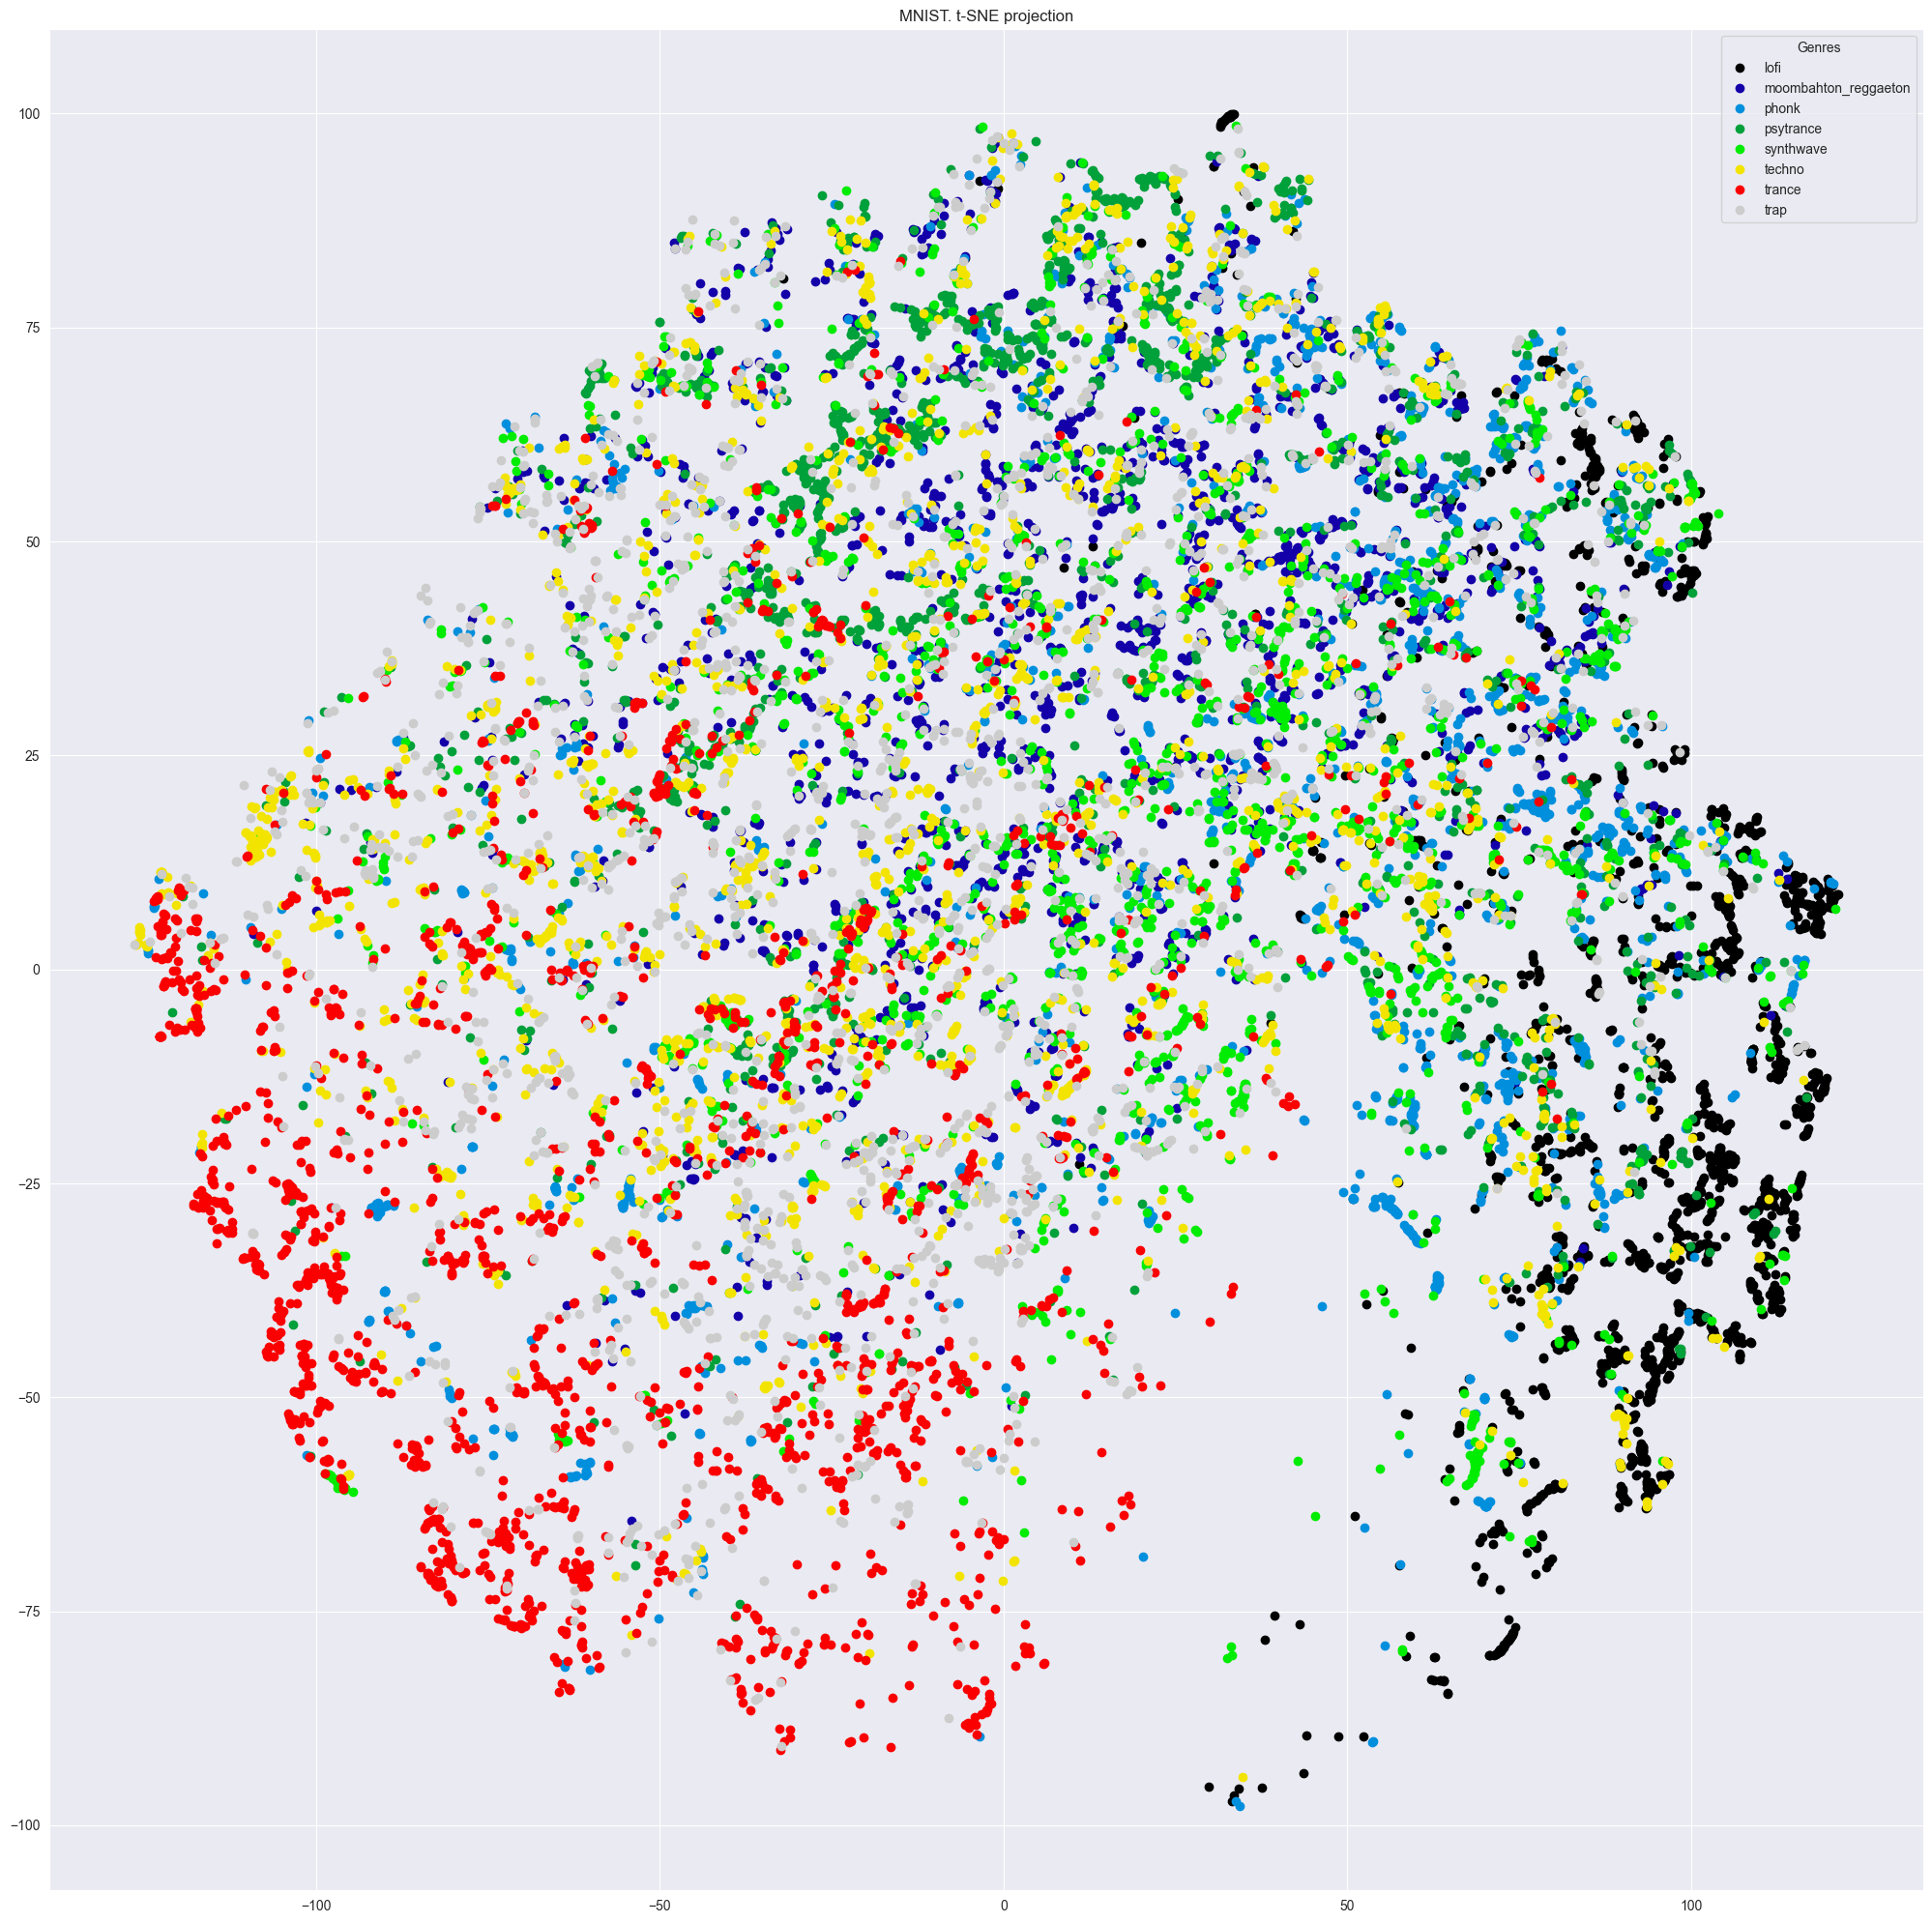

In [12]:
plt.figure(figsize=(25, 25))
cmap = plt.cm.get_cmap("nipy_spectral", 8)
for i, genre in enumerate(y.unique()[8:16]):
    plt.plot(X_tsne[y == genre, 0], X_tsne[y == genre, 1], marker='o', 
              linestyle='', color=cmap(i/cmap.N), label=genre)
plt.legend(title='Genres')
plt.title("MNIST. t-SNE projection")
plt.show()

Попытаемся оставить только самые сгруппированные кластеры. Удалим красный, голубой, фиолетовый, черный, желтый, зеленый, бирюзовый(совпадает с черным из предыдущего графика)

In [13]:
deletion = ['hardstyle', 'big_room_house','future_garage_wave_trap','dnb', 'trance','techno','trap', 'phonk', 'moombahton_reggaeton','psytrance','synthwave']
new_df = df.loc[~df['label'].isin(deletion)]

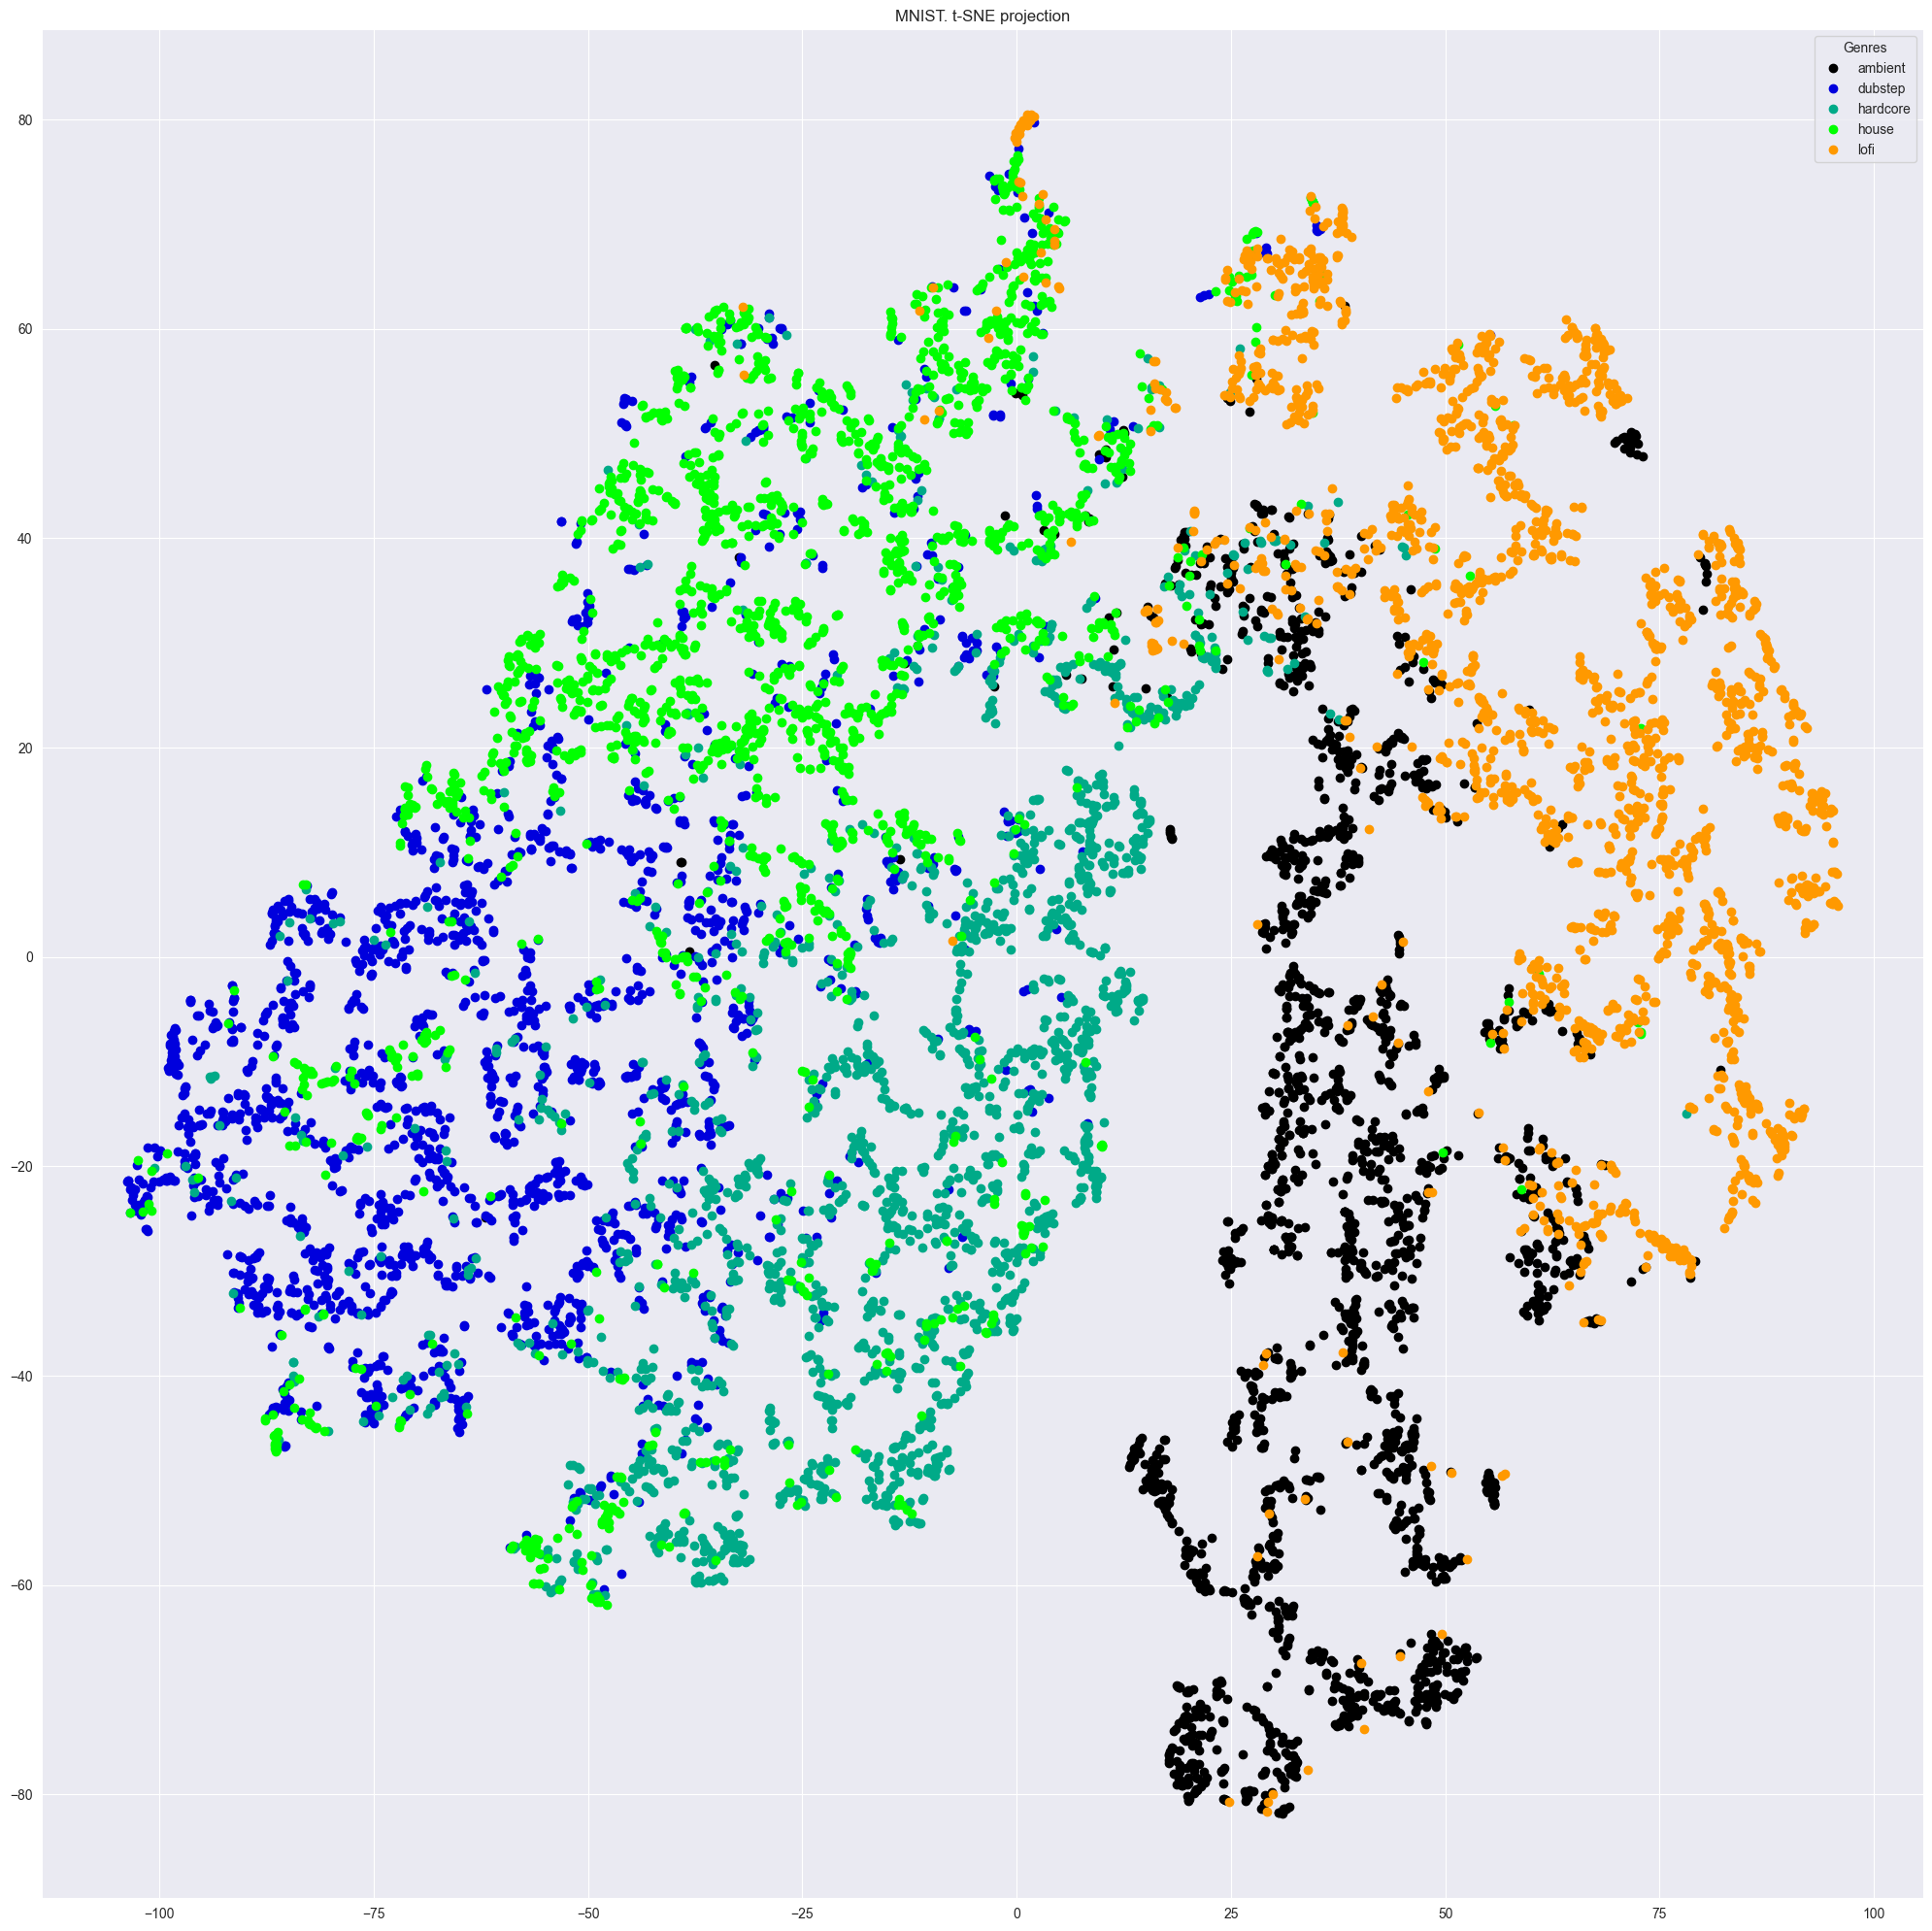

In [14]:
reduced_y = new_df['label']
reduced_X = new_df.drop(columns=['label'])
reduced_X_tsne = tsne.fit_transform(reduced_X)

plt.figure(figsize=(25, 25))
cmap = plt.cm.get_cmap("nipy_spectral", 6)
for i, genre in enumerate(reduced_y.unique()):
    plt.plot(reduced_X_tsne[reduced_y == genre, 0], reduced_X_tsne[reduced_y == genre, 1], marker='o', 
              linestyle='', color=cmap(i/cmap.N), label=genre)
plt.legend(title='Genres')
plt.title("MNIST. t-SNE projection")
plt.show()

Теперь видны визуально отделимые друг от друга кластеры. Попробуем обучить модель на сокращенных данных.

In [15]:
kmeans = KMeans(n_clusters=6 ,random_state=0)
clusters = kmeans.fit_predict(reduced_X)

unique = {key : i for i, key in enumerate(reduced_y.unique())}
reduced_y_nums = [unique[genre] for genre in reduced_y]

labels = np.zeros_like(clusters)
for i in range(6):
    mask = (clusters == i)
    labels[mask] = mode(np.array(reduced_y_nums)[mask])[0]

accuracy_score(reduced_y_nums, labels)

 0.6257

Получили более удачный результат, но видимо именно этот датасет не очень хорошо подходит для задач кластеризации.

In [16]:
for n_clusters in range(2 ,10):
    
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(reduced_X)
    
    silhouette_avg = silhouette_score(reduced_X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

For n_clusters = 2 The average silhouette_score is : 0.6659673600289848
For n_clusters = 3 The average silhouette_score is : 0.5277681143272577
For n_clusters = 4 The average silhouette_score is : 0.420680757345012
For n_clusters = 5 The average silhouette_score is : 0.3996009433586204
For n_clusters = 6 The average silhouette_score is : 0.38747862355453966
For n_clusters = 7 The average silhouette_score is : 0.36179836159352596
For n_clusters = 8 The average silhouette_score is : 0.3692729256211093
For n_clusters = 9 The average silhouette_score is : 0.3441602028593937


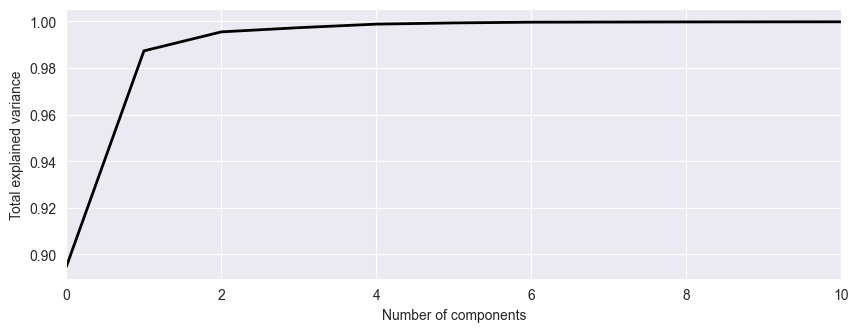

In [54]:
from sklearn.decomposition import PCA

pca = PCA().fit(X)

plt.figure(figsize=(10,3.5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 10)
plt.show();

Видно, что  4 компоненты объясняют около 99% дисперсии.

### 3. Реализация KMeans

In [117]:
from sklearn.base import BaseEstimator
from sklearn.utils import check_array

class MyKMeans(BaseEstimator):
    def __init__(self, n_clusters=8, max_iter=300, random_state = 0, eps=0.01):
        self.max_iter = max_iter
        self.random_state = random_state
        self.n_clusters = n_clusters
        self.cluster_centers_ = None
        self.eps = eps
    
    
    def fit(self, X, y=None):
        X = check_array(X)
        np.random.seed(self.random_state)
        self.cluster_centers_ = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        for _ in range(self.max_iter):
            labels = self.predict(X)
            new_centers = np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])
            if np.linalg.norm(new_centers - self.cluster_centers_) < self.eps:
                break
            self.cluster_centers_ = new_centers
        return self
    
    def predict(self, x):
        x = check_array(x)
        res = np.empty(shape=x.shape[0], dtype=int)
        for i, vec in enumerate(x):
            res[i] = np.argmin(np.linalg.norm(vec - self.cluster_centers_, axis=1))
        return res

### 4. Обучение моделей

In [152]:
stats = pd.DataFrame(
    columns=['model', 'PCA', 'rand_score',
             'training_time'])

In [153]:
import optuna
from datetime import datetime
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
def print_stat(study):
    print("Best trial:")
    trial = study.best_trial
        
    print("Rand_score : {}".format(trial.value))
    print("Params: ")
    for key, value in trial.params.items():
        print("  {} : {}".format(key, value))

def run_test(objective):
    func = lambda trial : objective(trial)
    study = optuna.create_study(direction="maximize", sampler=optuna.samplers.BruteForceSampler())
    study.optimize(func)
    print_stat(study)

#### 4.1 MyKMeans

In [154]:
from sklearn.model_selection import StratifiedKFold, cross_val_score


def objective(trial):
    rf_params = {
        "max_iter": trial.suggest_categorical(
            "max_iter", choices=[200, 300, 500]
        ),
        'n_clusters': 6,
        "random_state": 42,
        'eps': 0.01

    }
    reg = MyKMeans(**rf_params)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=rf_params["random_state"])
    cross_val = cross_val_score(reg, reduced_X, reduced_y_nums, scoring="rand_score", cv=cv, n_jobs=-1)   
    return cross_val.mean()

In [155]:
%%time

run_test(objective)

[I 2024-04-30 12:28:31,386] A new study created in memory with name: no-name-00cce12d-e669-43a7-a798-7aaf5039f076
[I 2024-04-30 12:28:40,866] Trial 0 finished with value: 0.8194646323161582 and parameters: {'max_iter': 500}. Best is trial 0 with value: 0.8194646323161582.
[I 2024-04-30 12:28:49,131] Trial 1 finished with value: 0.8194646323161582 and parameters: {'max_iter': 200}. Best is trial 0 with value: 0.8194646323161582.
[I 2024-04-30 12:28:57,610] Trial 2 finished with value: 0.8194646323161582 and parameters: {'max_iter': 300}. Best is trial 0 with value: 0.8194646323161582.


Best trial:
Rand_score : 0.8194646323161582
Params: 
  max_iter : 500
CPU times: total: 15.6 ms
Wall time: 26.2 s


In [156]:
from sklearn.metrics import rand_score

pcas = [0, 2, 4, 12]
for i in pcas:
    pca = PCA(n_components=i).fit_transform(reduced_X)
    res = {'model': 'MyKMeans', 'PCA': i}
    start_time = datetime.now()
    if i == 0:
        kmeans = MyKMeans(n_clusters=6, max_iter=200, random_state=42, eps=0.01).fit(reduced_X)
    else:
        kmeans = MyKMeans(n_clusters=6, max_iter=200, random_state=42, eps=0.01).fit(pca)
    res['training_time'] = datetime.now() - start_time
    if i == 0:
        res['rand_score'] = rand_score(reduced_y_nums, kmeans.predict(reduced_X))
    else:
        res['rand_score'] = rand_score(reduced_y_nums, kmeans.predict(pca))
    stats = pd.concat([stats, pd.DataFrame(res, index=[0])])
stats

,model,PCA,rand_score,training_time
0,MyKMeans,0,0.819515,0 days 00:00:05.152937
0,MyKMeans,2,0.819499,0 days 00:00:03.781098
0,MyKMeans,4,0.819180,0 days 00:00:03.821602
0,MyKMeans,12,0.819515,0 days 00:00:04.473638


#### 4.2 KMeans

In [157]:
def objective(trial):
    rf_params = {
        "max_iter": trial.suggest_categorical(
            "max_iter", choices=[200, 300, 500]
        ),
        "init": trial.suggest_categorical(
            "init", choices=['random', 'k-means++']
        ),
        'n_clusters': 6,
        "random_state": 42,
        'tol': 0.01

    }
    reg = KMeans(**rf_params)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=rf_params["random_state"])
    cross_val = cross_val_score(reg, X, y_nums, scoring="rand_score", cv=cv, n_jobs=-1)   
    return cross_val.mean()



In [158]:
%%time

run_test(objective)

[I 2024-04-30 12:29:15,299] A new study created in memory with name: no-name-79aa0103-f98b-4974-b33a-e64e7e075ff4
[I 2024-04-30 12:29:15,916] Trial 0 finished with value: 0.7909070948585717 and parameters: {'max_iter': 500, 'init': 'k-means++'}. Best is trial 0 with value: 0.7909070948585717.
[I 2024-04-30 12:29:16,752] Trial 1 finished with value: 0.7909070948585717 and parameters: {'max_iter': 300, 'init': 'k-means++'}. Best is trial 0 with value: 0.7909070948585717.
[I 2024-04-30 12:29:19,567] Trial 2 finished with value: 0.7843676160337554 and parameters: {'max_iter': 300, 'init': 'random'}. Best is trial 0 with value: 0.7909070948585717.
[I 2024-04-30 12:29:22,223] Trial 3 finished with value: 0.7843676160337554 and parameters: {'max_iter': 500, 'init': 'random'}. Best is trial 0 with value: 0.7909070948585717.
[I 2024-04-30 12:29:22,671] Trial 4 finished with value: 0.7909070948585717 and parameters: {'max_iter': 200, 'init': 'k-means++'}. Best is trial 0 with value: 0.7909070948

Best trial:
Rand_score : 0.7909070948585717
Params: 
  max_iter : 500
  init : k-means++
CPU times: total: 62.5 ms
Wall time: 10.2 s


In [159]:
for i in pcas:
    pca = PCA(n_components=i).fit_transform(reduced_X)
    res = {'model': 'KMeans', 'PCA': i}
    start_time = datetime.now()
    if i == 0:
        kmeans = KMeans(n_clusters=6, max_iter=200, random_state=42, tol=0.01, init='k-means++').fit(reduced_X)
    else:
        kmeans = KMeans(n_clusters=6, max_iter=200, random_state=42, tol=0.01, init='k-means++').fit(pca)
    res['training_time'] = datetime.now() - start_time
    if i == 0:
        res['rand_score'] = rand_score(reduced_y_nums, kmeans.predict(reduced_X))
    else:
        res['rand_score'] = rand_score(reduced_y_nums, kmeans.predict(pca))
    stats = pd.concat([stats, pd.DataFrame(res, index=[0])])
stats

,model,PCA,rand_score,training_time
0,MyKMeans,0,0.819515,0 days 00:00:05.152937
0,MyKMeans,2,0.819499,0 days 00:00:03.781098
0,MyKMeans,4,0.819180,0 days 00:00:03.821602
0,MyKMeans,12,0.819515,0 days 00:00:04.473638
0,KMeans,0,0.806633,0 days 00:00:00.031718
0,KMeans,2,0.813411,0 days 00:00:00
0,KMeans,4,0.809503,0 days 00:00:00
0,KMeans,12,0.802292,0 days 00:00:00


#### 4.3 GaussianMixture

In [160]:
def objective(trial):
    rf_params = {
        'n_components': 6,
        "random_state": 42,
        'covariance_type': trial.suggest_categorical(
            "covariance_type", choices=['full', 'tied', 'diag', 'spherical']
        ),
        'max_iter': trial.suggest_categorical(
            "max_iter", choices=[200, 300, 500]
        ),
        'tol': 0.01
    }
    reg = GaussianMixture(**rf_params)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=rf_params["random_state"])
    cross_val = cross_val_score(reg, X, y_nums, scoring="rand_score", cv=cv, n_jobs=-1)   
    return cross_val.mean()


In [161]:
%%time

run_test(objective)

[I 2024-04-30 12:29:25,733] A new study created in memory with name: no-name-3fac496d-05de-44c5-bf39-dffa4bcdcadc
[I 2024-04-30 12:29:37,286] Trial 0 finished with value: 0.75976031411158 and parameters: {'covariance_type': 'tied', 'max_iter': 200}. Best is trial 0 with value: 0.75976031411158.
[I 2024-04-30 12:29:39,597] Trial 1 finished with value: 0.8101489002187842 and parameters: {'covariance_type': 'diag', 'max_iter': 200}. Best is trial 1 with value: 0.8101489002187842.
[I 2024-04-30 12:29:41,964] Trial 2 finished with value: 0.8101489002187842 and parameters: {'covariance_type': 'diag', 'max_iter': 300}. Best is trial 1 with value: 0.8101489002187842.
[I 2024-04-30 12:29:53,894] Trial 3 finished with value: 0.75976031411158 and parameters: {'covariance_type': 'tied', 'max_iter': 300}. Best is trial 1 with value: 0.8101489002187842.
[I 2024-04-30 12:30:05,452] Trial 4 finished with value: 0.75976031411158 and parameters: {'covariance_type': 'tied', 'max_iter': 500}. Best is tria

Best trial:
Rand_score : 0.8101489002187842
Params: 
  covariance_type : diag
  max_iter : 200
CPU times: total: 766 ms
Wall time: 3min 7s


In [162]:
for i in pcas:
    pca = PCA(n_components=i).fit_transform(reduced_X)
    res = {'model': 'GMM', 'PCA': i}
    start_time = datetime.now()
    if i == 0:
        model = GaussianMixture(n_components=6, max_iter=300, random_state=42, tol=0.01, covariance_type='diag').fit(reduced_X)
    else:
        model = GaussianMixture(n_components=6, max_iter=300, random_state=42, tol=0.01, covariance_type='diag').fit(pca)
    res['training_time'] = datetime.now() - start_time
    if i == 0:
        res['rand_score'] = rand_score(reduced_y_nums, model.predict(reduced_X))
    else:
        res['rand_score'] = rand_score(reduced_y_nums, model.predict(pca))
    stats = pd.concat([stats, pd.DataFrame(res, index=[0])])
stats

,model,PCA,rand_score,training_time
0,MyKMeans,0,0.819515,0 days 00:00:05.152937
0,MyKMeans,2,0.819499,0 days 00:00:03.781098
0,MyKMeans,4,0.819180,0 days 00:00:03.821602
0,MyKMeans,12,0.819515,0 days 00:00:04.473638
0,KMeans,0,0.806633,0 days 00:00:00.031718
0,KMeans,2,0.813411,0 days 00:00:00
0,KMeans,4,0.809503,0 days 00:00:00
0,KMeans,12,0.802292,0 days 00:00:00
0,GMM,0,0.846845,0 days 00:00:00.236805
0,GMM,2,0.807230,0 days 00:00:00.018330


### 5. Выводы

In [163]:
stats

,model,PCA,rand_score,training_time
0,MyKMeans,0,0.819515,0 days 00:00:05.152937
0,MyKMeans,2,0.819499,0 days 00:00:03.781098
0,MyKMeans,4,0.819180,0 days 00:00:03.821602
0,MyKMeans,12,0.819515,0 days 00:00:04.473638
0,KMeans,0,0.806633,0 days 00:00:00.031718
0,KMeans,2,0.813411,0 days 00:00:00
0,KMeans,4,0.809503,0 days 00:00:00
0,KMeans,12,0.802292,0 days 00:00:00
0,GMM,0,0.846845,0 days 00:00:00.236805
0,GMM,2,0.807230,0 days 00:00:00.018330


В данной работе были реализованы и протестированы 3 модели кластеризации: MyKMeans, KMeans, GaussianM Mixture. Для тестирования использовался датасет с данными о музыкальных жанрах. Для улучшения качества кластеризации были удалены некоторые жанры, которые сильно похожи друг на друга. Также было проведено сокращение размерности с помощью метода PCA.
 
В результате тестирования лучшей моделью оказалась GaussianMixture, так как она лучше выделяет кластеры не сферической формы. Неизвестно почему MyKmeans показала себя немного лучше KMeans, возможно это связано с тем, что KMeans использует другой метод инициализации центроидов. Для модели KMean сокращение размерности улучшило результаты, согласно метрике rand_score. Для Kmeans подошло сокращение размерности до 2 компонент. Для GaussianMixture сокращение размерности ухудшило результат.

Быстрее всех обучается KMeans, так как это очень простой алгоритм. MyKMeans обучается значительно дольше так как не использует параллельные вычисления. GaussianMixture обучается дольше KMeans, так как это более сложный алгоритм.